## Breast cancer cell classification using Weighted K-Nearest Neighbor classifier. Use the dataset of file wisc_bc_data.csv and following settings to design the classifier:
-	Min-max feature normalization.
-	Randomly select 100 healthy and 100 cancerous cell samples to construct the training dataset. Use rest of the samples to estimate the accuracy of the classifier.
-	Calculate the accuracies for K = 9, 11, 13, 15, 17 and 19

In [1]:
import pandas as pd
import numpy as np
#Read the dataset using pandas
df = pd.read_csv('wisc_bc_data.csv')

In [2]:
#Printing first 5 rows of the train dataset.
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Dictionary
- radius_mean
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave points_worst
- symmetry_worst
- fractal_dimension_worst

In [3]:
df.shape

(569, 32)

###  Totaal rows = 569, Total columns = 33

In [4]:
#check if all the columns have numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#check if there are any null cells in dataset
df.isnull().sum()

#dropping useless column ID as it is not helful in training of our model.
df = df.drop('id', axis = True)

In [6]:
#preprocessing
#map diagnosis to numerical values 1,0 for M & B respectively
def diagnosis_mapping(diagnosis): 
    if diagnosis == 'M': 
        return 1
    else: 
        return 0
    
df['diagnosis'] = df['diagnosis'].apply(diagnosis_mapping) 

In [7]:
#dividing dataset into 2 on the basis of label
df_M = df[df['diagnosis'] == 1]
df_B = df[df['diagnosis'] == 0]

In [8]:
#randomly selecting 100 cancerous cell samples for training
df_M_train = df_M.sample(n=100)
df_M_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
132,1,16.16,21.54,106.2,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,...,19.47,31.68,129.7,1175.0,0.1395,0.3055,0.2992,0.1312,0.3480,0.07619
39,1,13.48,20.82,88.4,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,...,15.53,26.02,107.3,740.4,0.1610,0.4225,0.5030,0.2258,0.2807,0.10710
134,1,18.45,21.91,120.2,1075.0,0.09430,0.09709,0.11530,0.06847,0.1692,...,22.52,31.39,145.6,1590.0,0.1465,0.2275,0.3965,0.1379,0.3109,0.07610
317,1,18.22,18.87,118.7,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,...,21.84,25.00,140.9,1485.0,0.1434,0.2763,0.3853,0.1776,0.2812,0.08198
7,1,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,22.01,21.90,147.2,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,...,27.66,25.80,195.0,2227.0,0.1294,0.3885,0.4756,0.2432,0.2741,0.08574
14,1,13.73,22.61,93.6,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,...,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
521,1,24.63,21.60,165.5,1841.0,0.10300,0.21060,0.23100,0.14710,0.1991,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671
186,1,18.31,18.58,118.6,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.1571,0.3206,0.06938


In [9]:
#randomly selecting 100 healthy cell samples for training
df_B_train = df_B.sample(n=100)
df_B_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
309,0,13.050,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,...,14.730,17.40,93.96,672.4,0.10160,0.05847,0.01824,0.03532,0.2107,0.06580
472,0,14.920,14.93,96.45,686.9,0.08098,0.08549,0.055390,0.032210,0.1687,...,17.180,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
331,0,12.980,19.35,84.52,514.0,0.09579,0.11250,0.071070,0.029500,0.1761,...,14.420,21.95,99.21,634.3,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166
482,0,13.470,14.06,87.32,546.3,0.10710,0.11550,0.057860,0.052660,0.1779,...,14.830,18.32,94.94,660.2,0.13930,0.24990,0.18480,0.13350,0.3227,0.09326
518,0,12.880,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.053030,0.1709,...,15.050,24.37,99.31,674.7,0.14560,0.29610,0.12460,0.10960,0.2582,0.08893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,8.888,14.64,58.79,244.0,0.09783,0.15310,0.086060,0.028720,0.1902,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
348,0,11.470,16.03,73.02,402.7,0.09076,0.05886,0.025870,0.023220,0.1634,...,12.510,20.79,79.67,475.8,0.15310,0.11200,0.09823,0.06548,0.2851,0.08763
113,0,10.510,20.19,68.64,334.2,0.11220,0.13030,0.064760,0.030680,0.1922,...,11.160,22.75,72.62,374.4,0.13000,0.20490,0.12950,0.06136,0.2383,0.09026
232,0,11.220,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,...,12.360,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307


In [10]:
#joining the two dataframes to form whole training data
df_train = pd.concat([df_B_train, df_M_train], ignore_index=True)
df_train

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,13.05,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,...,14.73,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580
1,0,14.92,14.93,96.45,686.9,0.08098,0.08549,0.055390,0.032210,0.1687,...,17.18,18.22,112.00,906.6,0.1065,0.27910,0.31510,0.11470,0.2688,0.08273
2,0,12.98,19.35,84.52,514.0,0.09579,0.11250,0.071070,0.029500,0.1761,...,14.42,21.95,99.21,634.3,0.1288,0.32530,0.34390,0.09858,0.3596,0.09166
3,0,13.47,14.06,87.32,546.3,0.10710,0.11550,0.057860,0.052660,0.1779,...,14.83,18.32,94.94,660.2,0.1393,0.24990,0.18480,0.13350,0.3227,0.09326
4,0,12.88,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.053030,0.1709,...,15.05,24.37,99.31,674.7,0.1456,0.29610,0.12460,0.10960,0.2582,0.08893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.244800,0.150100,0.1824,...,27.66,25.80,195.00,2227.0,0.1294,0.38850,0.47560,0.24320,0.2741,0.08574
196,1,13.73,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.080250,0.2069,...,15.03,32.01,108.80,697.7,0.1651,0.77250,0.69430,0.22080,0.3596,0.14310
197,1,24.63,21.60,165.50,1841.0,0.10300,0.21060,0.231000,0.147100,0.1991,...,29.92,26.93,205.70,2642.0,0.1342,0.41880,0.46580,0.24750,0.3157,0.09671
198,1,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.081690,0.058140,0.1621,...,21.31,26.36,139.20,1410.0,0.1234,0.24450,0.35380,0.15710,0.3206,0.06938


In [11]:
#removing training data from whole dataset to obtain the test data
df_test = pd.concat([df, df_train])
df_test.drop_duplicates(keep=False)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.1459,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820


In [12]:
#extracting only featues from whole train sample
X_train = np.array(df_train.iloc[:, 1:]) 

#extracting only lables from whole train sample
y_train = np.array(df_train['diagnosis'])

In [13]:
#extracting only featues from whole test sample 
X_test = np.array(df_test.iloc[:, 1:]) 

#extracting only lables from whole test sample
y_test = np.array(df_test['diagnosis']) 

In [14]:
from sklearn import preprocessing
#Min-max feature normalization [0,1] using sklearn
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [15]:
scores = {}
scores_list = []
#importing KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
list_K = [9,11,13,15,17,19] #making a list of ks given in the question
for k in list_K:  
    knn = KNeighborsClassifier(n_neighbors = k, weights = 'distance') #weighted KNN using parameter 'weights'='distance'
    knn.fit(X_train,y_train) #training the model
    y_pred = knn.predict(X_test) #testing the model
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores #stored dictionary of k with their accuracies as key

{9: 0.9596879063719116,
 11: 0.9570871261378413,
 13: 0.9505851755526658,
 15: 0.9492847854356307,
 17: 0.9505851755526658,
 19: 0.9492847854356307}

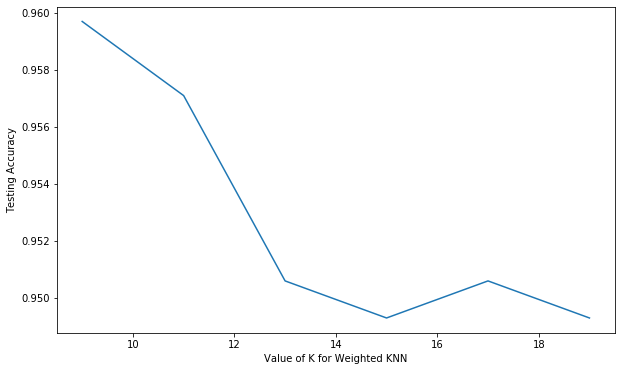

In [16]:
#ploting k and acuracies
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 6)) 
plt.plot(list_K,scores_list) 
plt.xlabel('Value of K for Weighted KNN') 
plt.ylabel('Testing Accuracy') 
plt.show() 